## Day 31 Lecture 1 Assignment

In this assignment, we will learn about the K nearest neighbor algorithm. We will use the titanic dataset and create a model that can predict if a passenger will survive the Titanic Shipwreck or not {0, 1}.

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

Columns:
- 'PassengerId': id of the passenger
- 'Survived': 
- 'Pclass': Ticket class
- 'Name': Name
- 'Sex': sex
- 'Age': Age in years
- 'SibSp': # of siblings / spouses aboard the Titanic
- 'Parch': # of parents / children aboard the Titanic
- 'Ticket': 
- 'Fare': Passenger fare
- 'Cabin': Cabin number
- 'Embarked': Port of Embarkation

In [2]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We check the distribution of variables for the column we want to predict.

In [3]:
# Calculate value counts for the Survived column
data['Survived'].value_counts()



0    549
1    342
Name: Survived, dtype: int64

First, check for missing data and remove all columns containing missing data

In [4]:
# Calculate NA values per column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.drop(columns='Cabin', inplace=True)
data.dropna(inplace=True)

We also drop columns that are not informative and contain too many unique values(e.g. name)

In [6]:
# Calculate unique values for each column
print('\n'.join([f"Column with name '{c}' has {data[c].nunique()} unique values" for c in data.columns]))    

Column with name 'PassengerId' has 712 unique values
Column with name 'Survived' has 2 unique values
Column with name 'Pclass' has 3 unique values
Column with name 'Name' has 712 unique values
Column with name 'Sex' has 2 unique values
Column with name 'Age' has 88 unique values
Column with name 'SibSp' has 6 unique values
Column with name 'Parch' has 7 unique values
Column with name 'Ticket' has 541 unique values
Column with name 'Fare' has 219 unique values
Column with name 'Embarked' has 3 unique values


In [7]:
# Drop columns 'PassengerId', 'Name' and 'Ticket'.
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Fare', 'Embarked'], inplace=True)

In [8]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


To use the data, we must convert all columns to numeric. Do this by replacing yes and no with 1 and 0.

In [9]:
# Use get_dummies to get a dataset with one hot encoded columns for categorical variables
# Survived should be excluded.
data['Sex'] = pd.get_dummies(data['Sex'], drop_first=True)

In [18]:
# Let's check the new columns
data.head(5)



,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


Split the data into train and test. Use 20% of the data for our test subset. We will use the train_test_split function from scikit-learn for this.

In [19]:
# Split the dataset. Remember that the y arrays should include only the 'Survived' column which should be excluded from
# the X arrays
from sklearn.model_selection import train_test_split
X = data.drop(columns='Survived')
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2)

Generate a KNN model with k=1 for the dataset. What is the accuracy score for the train and test subsamples?

In [24]:
from sklearn.neighbors import KNeighborsClassifier
# answer below:
neighbors = KNeighborsClassifier(n_neighbors=5)

neighbors.fit(X,y)

neighbors.predict([[3, 1, 29.0, 0, 1]])

array([1])

In [25]:
neighbors.predict_proba([[3, 1, 29.0, 0, 1]])

array([[0.4, 0.6]])

Would you say the model overfits? Why or why not? Put your answer in the comment below.

In [31]:
# answer below:
train_score = neighbors.score(X_train, y_train)
test_score = neighbors.score(X_test, y_test)
y_test_preds = neighbors.predict(X_test)
print('Train Score: {:.4f}'.format(train_score))
print('Test Score: {:.4f}'.format(test_score))
print(confusion_matrix(y_test, y_test_preds))
print(classification_report(y_test, y_test_preds))

Train Score: 0.8330
Test Score: 0.8881
[[88  7]
 [ 9 39]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        95
           1       0.85      0.81      0.83        48

    accuracy                           0.89       143
   macro avg       0.88      0.87      0.87       143
weighted avg       0.89      0.89      0.89       143



# Accuracy score is higher for the test set than the train set, indicating that the model is not overfitting to the training set

Let's optimize k. A good idea is to create plots that depict train and test accuracy for each candidate k. Since we have 2 classes, we will be selecting odd numbers in order to deal with possible ties. By selecting a really small k, e.g. k=1, we increase variance and the model is prone to overfitting since it will only take into account the nearest neighbor where there could be a lot of other close samples belonging to another class. By doing the opposite, selecting a big k we are prone to underfitting, as we increase bias as there is a higher probability to select the majority class.


In [14]:
from sklearn.metrics import accuracy_score, f1_score

accuracy_train = []
accuracy_test = []
f1_train = []
f1_test = []
k_list = range(1, 15, 2)

For each k value in the list created above we want to create and fit a knn instance on X_train, y_train and then make predictions both on the training set (X_train) as well as on the test set(X_test) and calculate accuracy and f1 score and append it to the corrensponding list.

In [32]:
# answer below:

for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  fit = knn.fit(X_train, y_train)
  accuracy_train.append(accuracy_score(y_train, knn.predict(X_train)))
  accuracy_test.append(accuracy_score(y_test, knn.predict(X_test)))
  f1_train.append(f1_score(y_train, knn.predict(X_train)))
  f1_test.append(f1_score(y_test, knn.predict(X_test)))

print(accuracy_train)
print(accuracy_test)
print(f1_train)
print(f1_test)


[0.9156414762741653, 0.8664323374340949, 0.836555360281195, 0.8172231985940246, 0.8101933216168717, 0.8101933216168717, 0.804920913884007]
[0.7412587412587412, 0.7902097902097902, 0.7762237762237763, 0.7762237762237763, 0.7272727272727273, 0.7762237762237763, 0.7552447552447552]
[0.9012345679012346, 0.8403361344537815, 0.794701986754967, 0.7657657657657657, 0.755656108597285, 0.7476635514018691, 0.74364896073903]
[0.6262626262626263, 0.7, 0.6666666666666666, 0.627906976744186, 0.5411764705882353, 0.6, 0.5679012345679013]


In the following plot we want to select the k that achieves the highest test score. 

Create a two plots with each of them depicting the following information:
1. Two lines, one for training accuracy and one for test accuracy for each k value.
2. Two lines, one for training F1score and one for test F1 score for each k value.

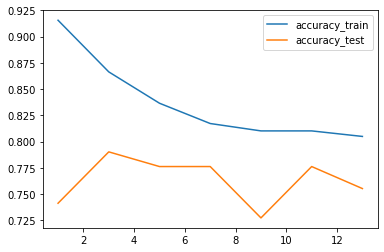

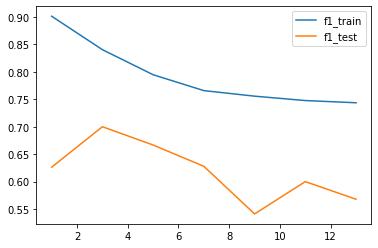

In [33]:
# answer below:
plt.figure()
plt.plot(k_list, accuracy_train)
plt.plot(k_list, accuracy_test)
plt.legend(['accuracy_train', 'accuracy_test'])
plt.show()

plt.figure()
plt.plot(k_list, f1_train)
plt.plot(k_list, f1_test)
plt.legend(['f1_train', 'f1_test'])
plt.show()



Please comment the results of the plots above

In [17]:
# Add your observations in comments below.

